# Import Libraries 

In [1]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1


# 1) Import Dataset 

In [2]:
#Import the Dataset
Bank=pd.read_csv(r"C:\Users\Digambar\OneDrive\Desktop\Imarticus Learing\Machine Learning\Supervised Machie Learning\Ensemble Model\Bank_Loan.csv")
Bank

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Graduate,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Graduate,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Graduate,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,Not Graduate,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Graduate,No,28991,402474,Yes,703,Urban,Good,11,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,28,Male,Yes,0,Not Graduate,Yes,91473,643710,Yes,631,Urban,Medium,36,No
977,LP002975,46,Male,Yes,2,Graduate,No,82832,191806,Yes,697,Urban,Good,16,No
978,LP002980,40,Male,No,0,Graduate,No,40912,160512,Yes,790,Semiurban,Good,5,No
979,LP002986,31,Male,Yes,4,Graduate,No,77945,817294,Yes,889,Rural,Good,28,Yes


### Checking Rows and Columns


In [3]:
print ("Rows     : " ,Bank.shape[0])
print ("Columns  : " ,Bank.shape[1])


Rows     :  981
Columns  :  15


In [4]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Loan_ID              981 non-null    object
 1   Age                  981 non-null    int64 
 2   Gender               981 non-null    object
 3   Married              981 non-null    object
 4   Dependents           981 non-null    int64 
 5   Education            981 non-null    object
 6   Self_Employed        981 non-null    object
 7   ApplicantIncome      981 non-null    int64 
 8   LoanAmount           981 non-null    int64 
 9   Previous_Loan_Taken  981 non-null    object
 10  Cibil_Score          981 non-null    int64 
 11  Property_Area        981 non-null    object
 12  Customer_Bandwith    981 non-null    object
 13  Tenure               981 non-null    int64 
 14  Loan_Status          981 non-null    object
dtypes: int64(6), object(9)
memory usage: 115.1+ KB


### Missing Value 

In [5]:
Bank.isnull().sum()

Loan_ID                0
Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

### Removing Irrelavent Variable 

In [6]:
Bank = Bank.drop(['Loan_ID'],axis=1)
Bank.columns

Index(['Age', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Previous_Loan_Taken', 'Cibil_Score',
       'Property_Area', 'Customer_Bandwith', 'Tenure', 'Loan_Status'],
      dtype='object')

In [7]:
# #Employee Numeric columns
Bank_num = Bank[Bank.select_dtypes(include=[np.number]).columns.tolist()]
Bank_num.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


In [8]:
Bank_dummies = Bank[Bank.select_dtypes(include=['object']).columns.tolist()]
Bank_dummies.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,Male,No,Graduate,No,Yes,Urban,Good,No
1,Male,Yes,Graduate,No,Yes,Rural,Good,Yes
2,Male,Yes,Graduate,Yes,Yes,Urban,Good,No


In [9]:
from sklearn.preprocessing import LabelEncoder
Bank_dummies=Bank_dummies.apply(LabelEncoder().fit_transform)
Bank_dummies.head(3)
# label in ascending order

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,1,0,0,0,1,2,1,0
1,1,1,0,0,1,0,1,1
2,1,1,0,1,1,2,1,0


In [10]:
Bank_combined = pd.concat([Bank_num, Bank_dummies],axis=1)
Bank_combined.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,43,3,54005,334113,668,43,1,0,0,0,1,2,1,0
1,57,2,28817,736026,684,13,1,1,0,0,1,0,1,1
2,25,3,99939,712432,788,10,1,1,0,1,1,2,1,0
3,44,1,38470,267161,888,9,1,1,1,0,1,2,1,0
4,58,1,28991,402474,703,11,1,0,0,0,1,2,1,0


# 2) Data Partition 

In [12]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = Bank_combined.drop('Loan_Status',axis=1)
y = Bank_combined[["Loan_Status"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [13]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 784.
The number of samples into the Test data is 197.


# 3) Model -- Xg Boosting

In [14]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6]} #parent 

In [17]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier(reg_lambda=0)   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [18]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [19]:
parent_params = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_params = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

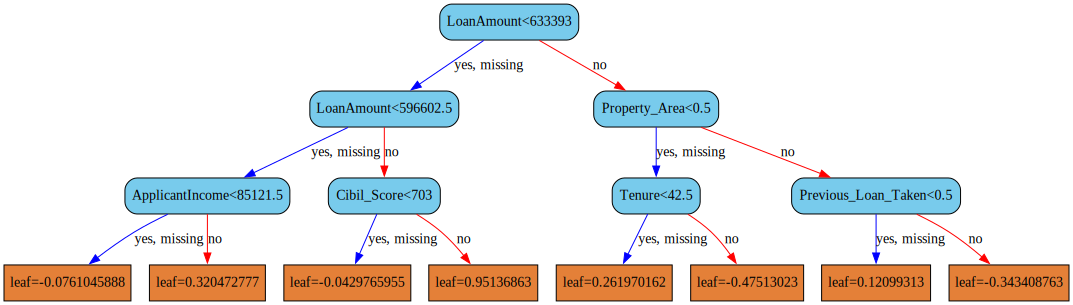

In [20]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 50 
               condition_node_params=parent_params,
               leaf_node_params=child_params)

Yhat = Initial Prediction + Learning rate * Average error0 + Learning rate * Average error2 + ... + Learning rate * Average error49 <br>
yhat = 0.5               + 0.3           * -0.568063915   +        0.3    * -0.455574751    +  

# 4) Accuracy of Train 

In [22]:
train=pd.concat([x_train,y_train],axis=1)
train['Predicted']=final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
704,20,0,52193,487782,723,18,1,1,0,1,1,0,1,0,0
640,60,1,82217,541174,725,9,1,1,0,0,1,2,1,0,0
19,34,1,62204,404009,699,35,1,1,0,1,1,2,1,0,0
574,20,0,93418,506749,869,13,1,1,0,0,1,1,1,1,0
205,29,3,75269,869687,797,7,0,0,1,0,1,1,1,0,0


In [23]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       570
           1       0.94      0.79      0.86       214

    accuracy                           0.93       784
   macro avg       0.93      0.89      0.91       784
weighted avg       0.93      0.93      0.93       784



# 5) Accuracy of Test 

In [24]:
test=pd.concat([x_test,y_test],axis=1)
test['Predicted']=final_mod.predict(x_test)  # MODEL = Final_mod
test.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
457,21,5,34229,866491,467,9,1,1,0,0,1,2,2,1,1
929,53,4,80885,823274,735,44,0,1,0,0,1,1,1,0,0
329,36,0,65075,134775,675,5,0,0,0,0,1,2,1,0,0
349,21,2,33070,682534,723,47,1,1,0,0,1,0,1,0,0
783,57,4,32689,738073,622,6,0,1,0,0,1,0,2,1,0


In [25]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       142
           1       0.88      0.82      0.85        55

    accuracy                           0.92       197
   macro avg       0.91      0.89      0.90       197
weighted avg       0.92      0.92      0.92       197



# Finish 

# Importance Feature 

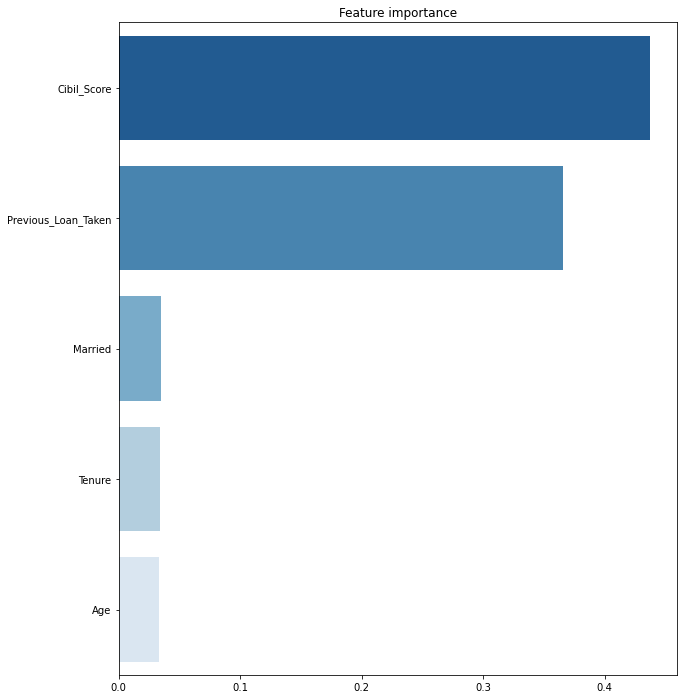

In [27]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')